In [ ]:

import numpy as np

from py21cmemu import Emulator

import matplotlib.pyplot as plt

from matplotlib import rcParams
import matplotlib.patches as mpatches
rcParams.update({'font.size' : 40})
#yes

In [35]:
test_sample = np.load('Test_data_sample.npz')
print(list(test_sample.keys()))

['X_test', 'parameters', 'limits', 'Ts', 'Tb', 'PS', 'tau', 'UVLFs', 'xHI']


In [36]:
test_params = test_sample['X_test']

In [38]:
Tb_true = test_sample['Tb']
xHI_true = test_sample['xHI']
tau_true = test_sample['tau']
PS_true = test_sample['PS']
print(tau_true.shape)

(100,)


In [39]:
emu = Emulator()
normed_input_params, output, output_errors = emu.predict(test_params, verbose = True, )

4/4 [==============================] - 1s 53ms/step


In [7]:
theta = np.random.rand(9*5).reshape((5,9))
theta, out, out_err = emu.predict(theta)

In [44]:
Tb_emu = output['Tb']
xHI_emu = output['xHI']
zs = output['redshifts']
tau_emu = output['tau']
PS_emu = output['PS']
print(tau_emu.shape)
print(zs.shape)
print(Tb_emu.shape)
print(xHI_emu.shape)

(100,)
(84,)
(100, 84)
(100, 84)


In [18]:
def plot_true_vs_emu(x, y_true, y_emu, x_label,
                     y_label, xlims = None, N = 10, offset = 0,
                     cs = None, leg_loc = (0.5,0.5)):
    if cs is None:
        cs = ['k','lime','b', 'orange', 'cyan', 'magenta', 'grey', 'pink', 'darkred', 'coral']
    y_diff = abs(y_true - y_emu)
    fig, axs = plt.subplots(nrows = 2, ncols = 1, sharex = True,figsize = (14,12), gridspec_kw=dict(height_ratios=[3,2], hspace=0))
    axs = axs.flatten()

    diff_err_z = np.nanpercentile(y_diff, [2.5, 16,50, 84, 97.5], axis = 0)
    for i, c in zip(range(N), cs):
        if i == N-1:
            labels = ['21cmEMU', 'Test Set']
        else:
            labels = [None, None]
        axs[0].plot(x, y_true[i + offset, :], lw = 3, color = c, label = labels[1], alpha = 0.5)
        axs[1].plot(x, y_diff[i + offset, :], ls = '-.', alpha = 0.5, lw = 2, color = c)
        axs[0].plot(x, y_emu[i + offset, :], lw = 2, ls = '-.', color = c, label = labels[0], alpha = 0.8)

    axs[0].legend(loc = leg_loc, frameon = False)#framealpha=0.3)
    axs[1].plot(x, diff_err_z[2, :], ls = '--', lw = 3, color = 'k', label = r'Median')
    axs[1].fill_between(x, diff_err_z[1, :], diff_err_z[3, :], color = 'k', alpha = 0.2, label = r'68% CI')
    axs[1].fill_between(x, diff_err_z[0, :], diff_err_z[4, :], color = 'k', alpha = 0.1, label = r'95% CI')

    handles = [mpatches.Patch(color='k', label='68% CI', alpha = 0.3),
              mpatches.Patch(color='k', label='95% CI', alpha = 0.1),
              ]
    plt.legend(handles=handles, loc = (0.6,0.5), frameon = False)
    axs[0].set_ylabel(y_label)
    axs[1].set_ylabel(r'Abs Diff')
    axs[1].set_xlabel(x_label)
    
    if xlims is not None:
        plt.xlim(xlims[0], xlims[1])
    else:
        plt.xlim(min(x), max(x))
    plt.tight_layout()
    plt.show()

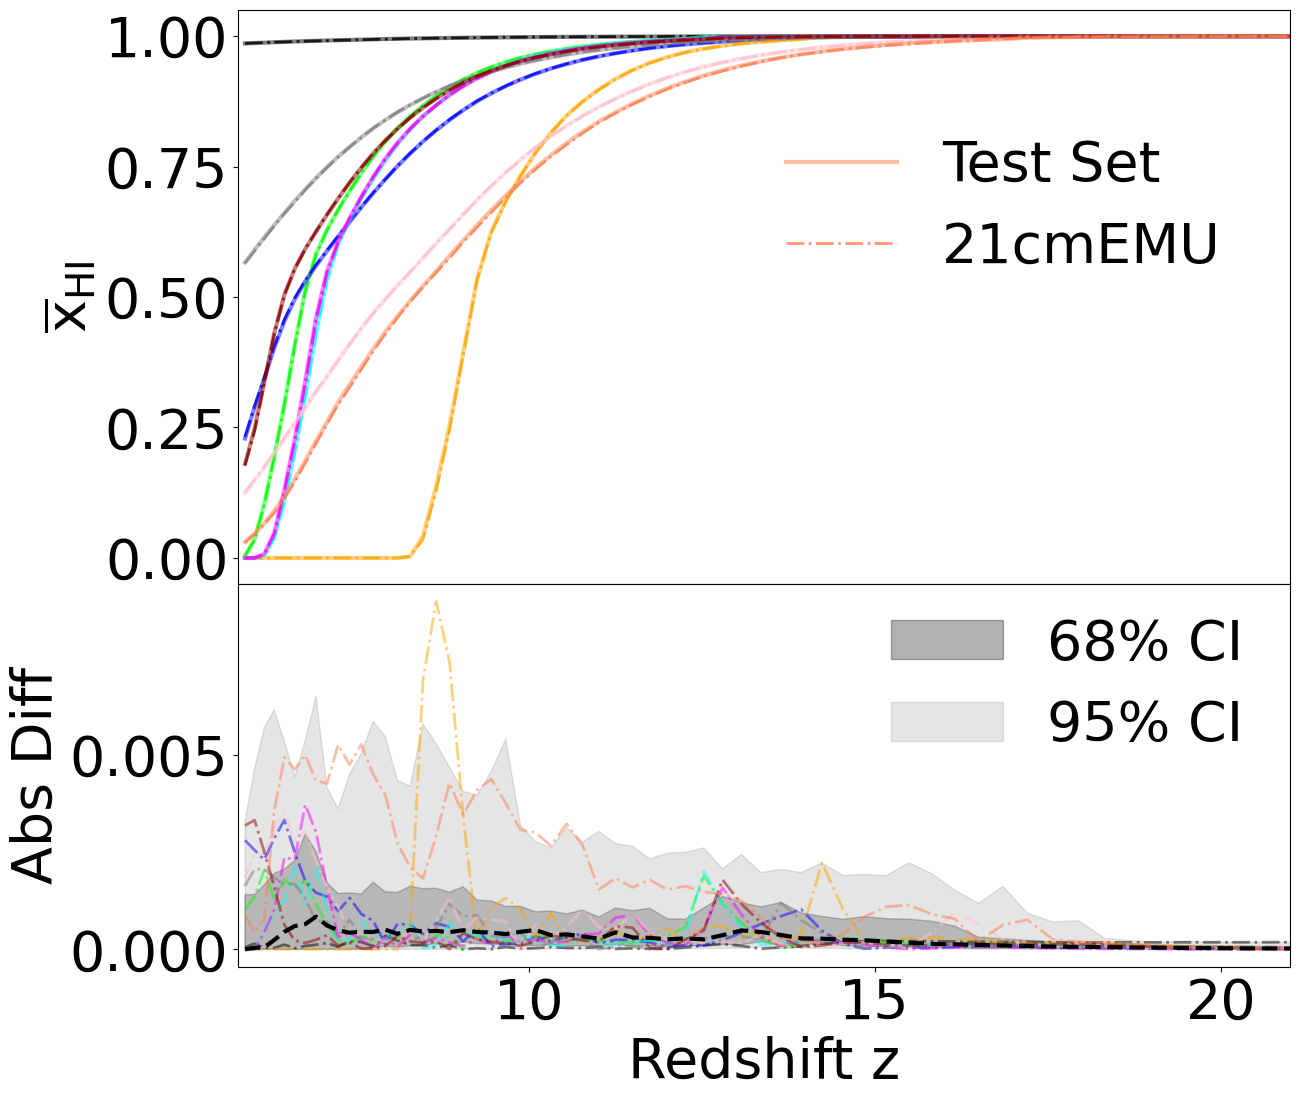

In [19]:
plot_true_vs_emu(zs, xHI_true, xHI_emu, r'Redshift z', r'$\overline{\mathrm{x}}_{\rm{HI}}$', xlims = [5.8, 21])

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from py21cmemu import Emulator

In [46]:
test_param = [-0.98454527, 0.84028646, -1.01608287, 0.03414988, 9.02499104, 0.45168016, 40.0, 500.0, 1.0]
keys = ['F_STAR10', 'ALPHA_STAR', 'F_ESC10', 'ALPHA_ESC', 'M_TURN', 't_STAR', 'L_X','NU_X_THRESH', 'X_RAY_SPEC_INDEX']

input_dict = {k:v for k, v in zip(keys, test_param)}

In [47]:
input_dict

{'F_STAR10': -0.98454527,
 'ALPHA_STAR': 0.84028646,
 'F_ESC10': -1.01608287,
 'ALPHA_ESC': 0.03414988,
 'M_TURN': 9.02499104,
 't_STAR': 0.45168016,
 'L_X': 40.0,
 'NU_X_THRESH': 500.0,
 'X_RAY_SPEC_INDEX': 1.0}

In [48]:
emu = Emulator()

In [49]:
theta, out, errs = emu.predict(input_dict)

In [ ]:
zs = out.redshifts
xHI = out.xHI
Tb = out.Tb



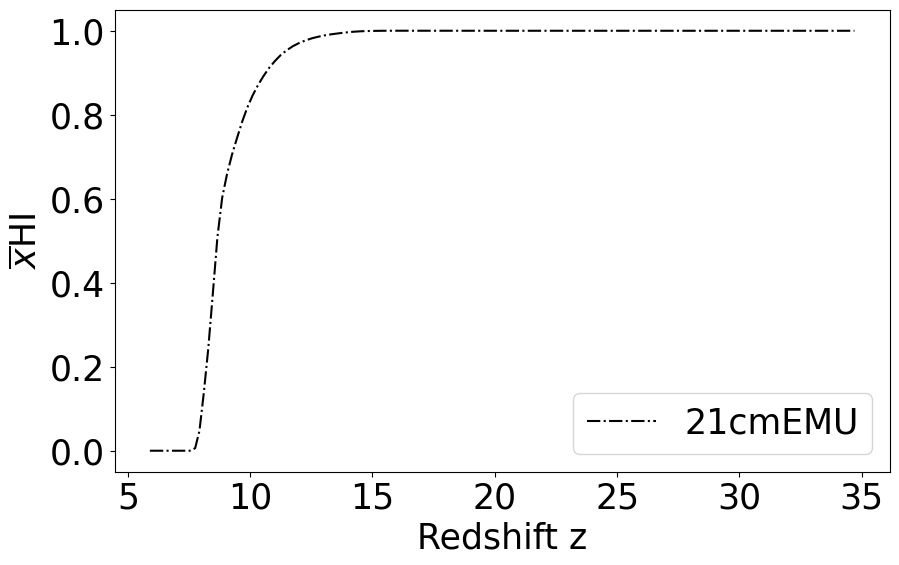

In [19]:
plt.figure(figsize = (10, 6))
fs = 25
plt.plot(zs, xHI, ls = '-.', color = 'k', label = '21cmEMU')
plt.legend(fontsize = fs)
plt.xticks(fontsize = fs)
plt.yticks(fontsize = fs)
plt.ylabel(r'$\overline{x}$HI', fontsize = fs)
plt.xlabel(r'Redshift z', fontsize = fs)
plt.show()

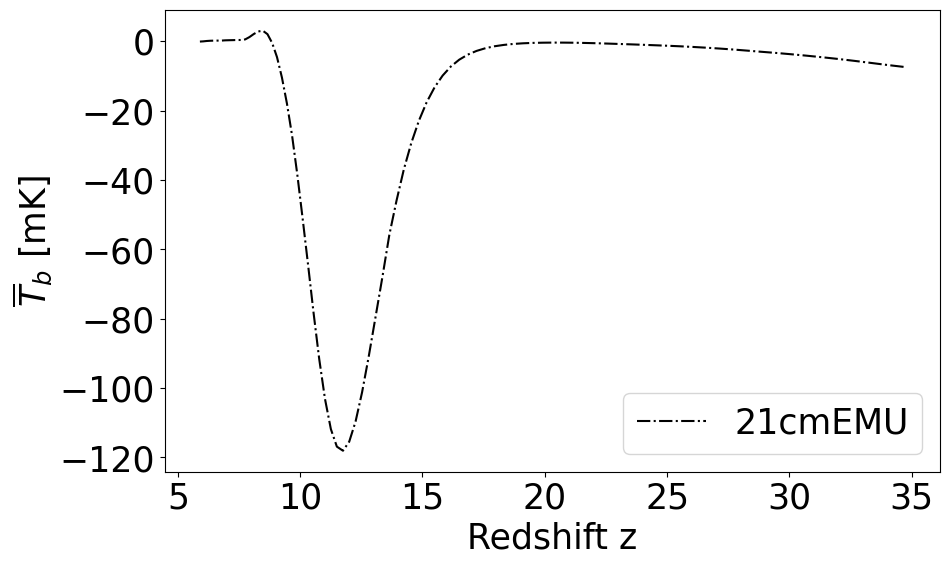

In [24]:
plt.figure(figsize = (10, 6))

plt.plot(zs, Tb, ls = '-.', color = 'k', label = '21cmEMU')
plt.legend(fontsize = fs)
plt.xticks(fontsize = fs)
plt.yticks(fontsize = fs)
plt.ylabel(r'$\overline{T}_b$ [mK]', fontsize = fs)
plt.xlabel(r'Redshift z', fontsize = fs)
plt.show()

In [129]:
PS_k = out.k
PS_z = out.PS_redshifts
PS = out.PS

In [130]:
idxs0 = np.arange(PS.shape[0])
np.random.seed(42)
np.random.shuffle(idxs0)
N = 10
idxs0 = idxs0[:N]
print(idxs0)
cs = ['r', 'g', 'b', 'lime', 'cyan', 'orange', 'k', 'tan', 'firebrick', 'magenta']

[ 0  5 36 45 13 54 33 48 12 57]


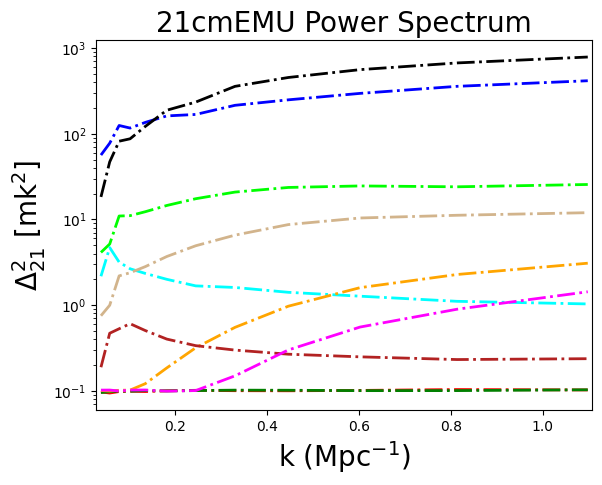

In [131]:
fs = 20

for i, c in zip(idxs0, cs):

    plt.plot(PS_k, PS[i, :], lw = 2, ls = '-.', color = c)  # different redshifts for each line

plt.ylabel(r'$\Delta_{21}^2$ [mk$^2$]', fontsize = fs)
plt.xlabel(r'k (Mpc$^{-1}$)', fontsize = fs)
plt.xlim(PS_k[0] - 1e-2, PS_k[-1] + 1e-2)
plt.yscale('log')
plt.title('21cmEMU Power Spectrum', fontsize = fs)
plt.show()


[10  9  0  8  5  2  1 11  4  7]


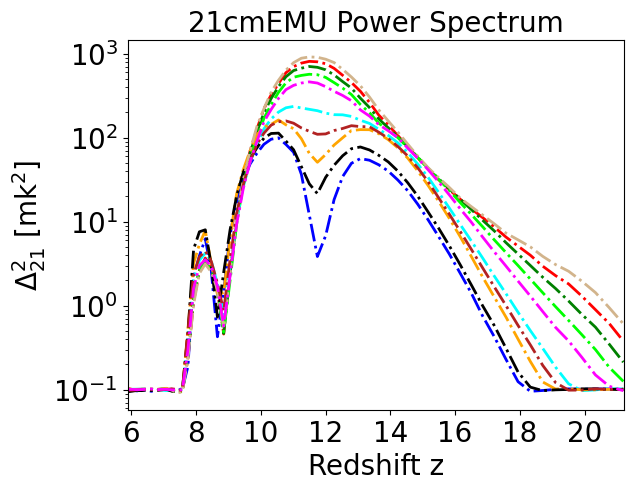

In [134]:
idxs1 = np.arange(PS.shape[1])
np.random.seed(42)
np.random.shuffle(idxs1)
N = 10
idxs1 = idxs1[:N]
print(idxs1)

fs = 20

for i, c in zip(idxs1, cs):

    plt.plot(PS_z, PS[:, i], lw = 2, ls = '-.', color = c)  # different k-values for each line

plt.ylabel(r'$\Delta_{21}^2$ [mk$^2$]', fontsize = fs)
plt.xlabel(r'Redshift z', fontsize = fs)
plt.xlim(PS_z[0] - 1e-2, PS_z[-1] + 1e-2)
plt.yticks(fontsize = fs)
plt.xticks(fontsize = fs)
plt.yscale('log')
plt.title('21cmEMU Power Spectrum', fontsize = fs)
plt.show()
